In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
sns.set_palette('colorblind')

In [3]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### ID

In [5]:
df['ID'].min(), df['ID'].max(), df['ID'].nunique()

(0, 11191, 2240)

### Year_Birth

In [6]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

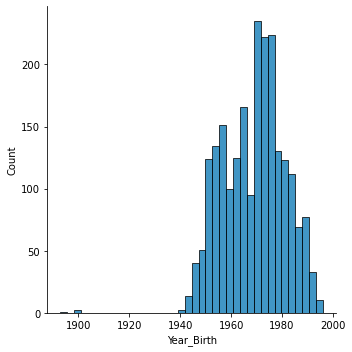

In [7]:
sns.displot(data=df, x='Year_Birth')

In [8]:
df[df['Year_Birth'] < 1930]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


### Education

In [9]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

### Marital Status

In [10]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
df[df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
131,433,1958,Master,Alone,61331.0,1,1,10-03-2013,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0
138,7660,1973,PhD,Alone,35860.0,1,1,19-05-2014,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1
153,92,1988,Graduation,Alone,34176.0,1,0,12-05-2014,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1


### Income

In [12]:
df['Income'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.98, 0.99])

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
90%       79844.000000
95%       84130.000000
98%       90741.600000
99%       94458.800000
max      666666.000000
Name: Income, dtype: float64

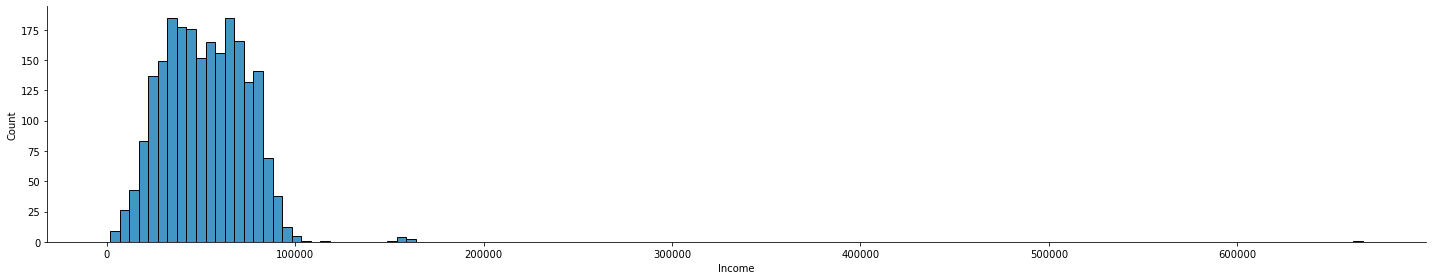

In [13]:
sns.displot(data=df, x='Income', height=4, aspect=5)

In [14]:
df[df['Income'] > 99458.8]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
124,7215,1983,Graduation,Single,101970.0,0,0,12-03-2013,69,722,27,102,44,72,168,0,6,8,13,2,0,1,1,1,0,0,3,11,1
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
203,2798,1977,PhD,Together,102160.0,0,0,02-11-2012,54,763,29,138,76,176,58,0,7,9,10,4,0,1,1,1,0,0,3,11,1
252,10089,1974,Graduation,Divorced,102692.0,0,0,05-04-2013,5,168,148,444,32,172,148,1,6,9,13,2,0,1,1,1,1,0,3,11,1
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
646,4611,1970,Graduation,Together,105471.0,0,0,21-01-2013,36,1009,181,104,202,21,207,0,9,8,13,3,0,0,1,1,0,0,3,11,1
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0


### Kidhome

In [15]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

### Teenhome

In [16]:
df['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

### Dt Customer

In [17]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].describe(datetime_is_numeric=True)

count                             2240
mean     2013-07-11 22:57:38.571428608
min                2012-01-08 00:00:00
25%                2013-01-19 18:00:00
50%                2013-07-11 00:00:00
75%                2013-12-30 06:00:00
max                2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

In [43]:
df['Dt_Customer'].value_counts().head(10)

2012-08-31    12
2013-02-14    11
2012-12-09    11
2014-12-05    11
2014-05-22    10
2013-08-20    10
2012-10-29     9
2014-05-04     9
2014-01-03     9
2013-02-01     9
Name: Dt_Customer, dtype: int64

In [18]:
df['Dt_Customer'].dt.year.value_counts()

2013    1189
2014     557
2012     494
Name: Dt_Customer, dtype: int64

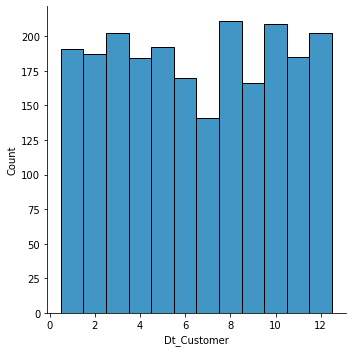

In [19]:
sns.displot(data=df, x=df['Dt_Customer'].dt.month, discrete=True)# df['Dt_Customer'].dt.month.value_counts().sort_index()

### Recency

In [20]:
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [21]:
(df['Recency'] == 99).sum()

17

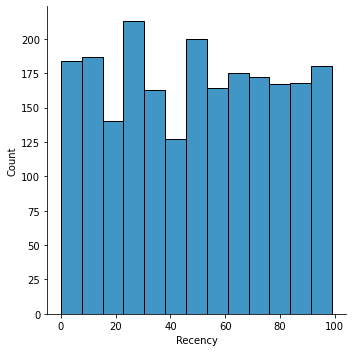

In [22]:
sns.displot(data=df, x = 'Recency')

In [23]:
df[df['Recency'] >= 99]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
38,8595,1973,Graduation,Widow,42429.0,0,1,2014-11-02,99,55,0,6,2,0,4,2,1,1,3,5,0,0,0,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
208,868,1966,Graduation,Married,44794.0,0,1,2014-08-06,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,3,11,0
444,2106,1974,2n Cycle,Married,20130.0,0,0,2014-03-17,99,0,6,3,7,6,12,1,1,0,3,8,0,0,0,0,0,0,3,11,0
491,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,3,11,0
606,7232,1973,Graduation,Widow,42429.0,0,1,2014-11-02,99,55,0,6,2,0,4,2,1,1,3,5,0,0,0,0,0,0,3,11,0
685,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,3,11,0
700,9977,1973,Graduation,Divorced,78901.0,0,1,2013-09-17,99,321,11,309,33,26,34,3,9,3,5,4,0,0,0,0,0,0,3,11,0
725,7212,1966,Graduation,Married,44794.0,0,1,2014-08-06,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,3,11,0
1033,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,3,11,0


### Mnt Wines, Fruits, Meat, Fish, Sweet, Gold

In [24]:
df['MntWines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

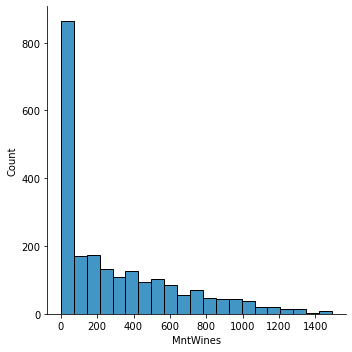

In [25]:
sns.displot(data=df, x='MntWines')

In [26]:
df[df['MntWines'] == 1493]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1749,737,1949,PhD,Married,80360.0,0,0,2013-03-03,56,1493,86,454,112,43,43,2,4,4,5,2,0,1,1,1,0,0,3,11,0


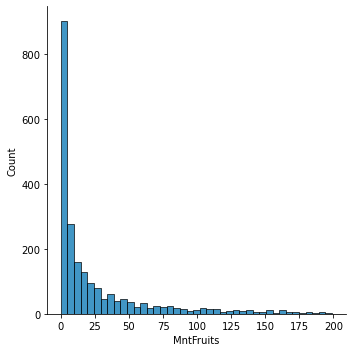

In [27]:
sns.displot(data=df, x='MntFruits')

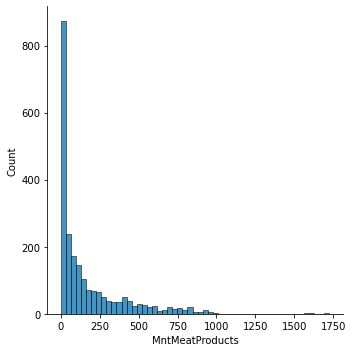

In [28]:
sns.displot(data=df, x='MntMeatProducts')

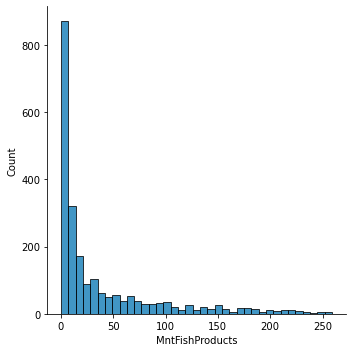

In [29]:
sns.displot(data=df, x='MntFishProducts')

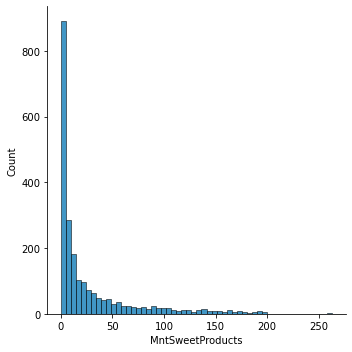

In [30]:
sns.displot(data=df, x='MntSweetProducts')

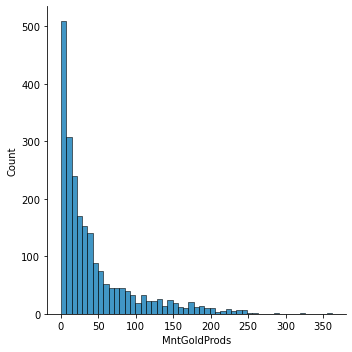

In [31]:
sns.displot(data=df, x='MntGoldProds')

In [32]:
(df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']] == 0).sum()

MntWines             13
MntFruits           400
MntMeatProducts       1
MntFishProducts     384
MntSweetProducts    419
MntGoldProds         61
dtype: int64

### NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases

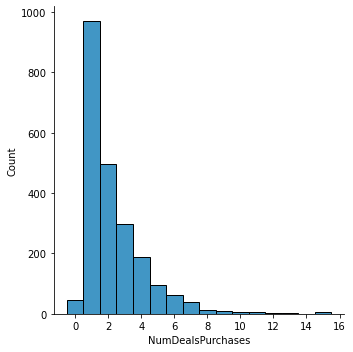

In [33]:
sns.displot(data=df, x='NumDealsPurchases', discrete=True)

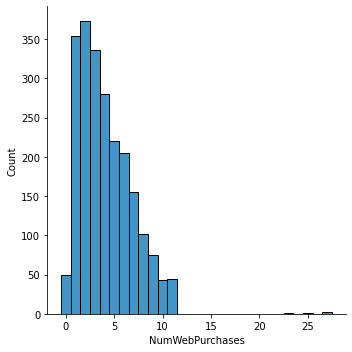

In [34]:
sns.displot(data=df, x='NumWebPurchases', discrete=True)

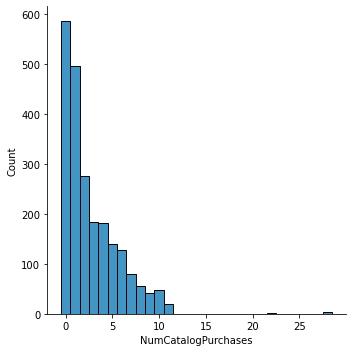

In [35]:
sns.displot(data=df, x='NumCatalogPurchases', discrete=True)

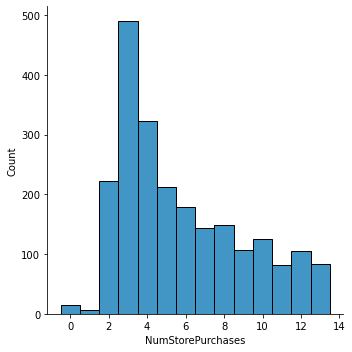

In [36]:
sns.displot(data=df, x='NumStorePurchases', discrete=True)

### NumWebVisitsMonth

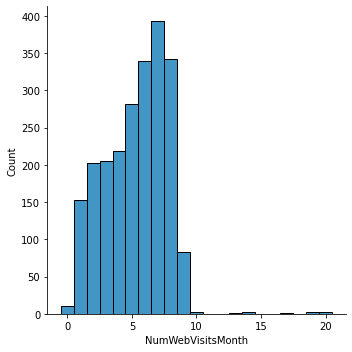

In [37]:
sns.displot(data=df, x='NumWebVisitsMonth', discrete=True)

### AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2

In [38]:
acptd_total = pd.DataFrame(index=[0, 1])
for i in range(1, 6):
    acptd = df[f'AcceptedCmp{i}'].value_counts()
    acptd_total = acptd_total.join(acptd)
acptd_total

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,2096,2210,2077,2073,2077
1,144,30,163,167,163


### Complain

In [39]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

### Z_CostContact

In [40]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

### Z_Revenue

In [41]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

### Response

In [42]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

### KidHome x TeenHome

In [47]:
df.groupby(['Kidhome', 'Teenhome']).count()['ID']
#sns.relplot(data=data, x='Kidhome', y='Teenhome', size='ID')

Kidhome  Teenhome
0        0           638
         1           625
         2            30
1        0           503
         1           374
         2            22
2        0            17
         1            31
Name: ID, dtype: int64

### AcceptedCmp

<AxesSubplot:>

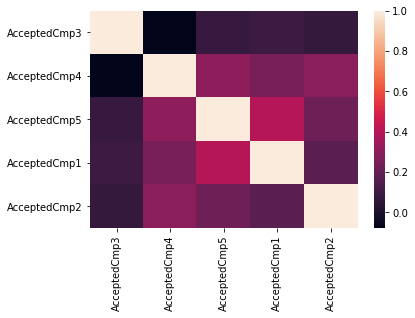

In [48]:
sns.heatmap(df.filter(like='AcceptedCmp').corr())

## Data preprocessing

In [50]:
df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

In [51]:
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df.drop(columns=['Dt_Customer'], inplace=True)

In [53]:
education = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}
df['Education'].replace(education, inplace=True)

In [55]:
df = pd.get_dummies(df, 'Marital_Status', drop_first=True)# df['Marital_Status']

In [66]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [56]:
df.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Year,Dt_Customer_Month,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,4,0,0,0,1,0,0,0
1,1954,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,8,0,0,0,1,0,0,0
2,1965,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,0,0,0,0,1,0,0
3,1984,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,10,0,0,0,0,1,0,0
4,1981,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,0,0,1,0,0,0,0


## Clustering

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2240 non-null   int64  
 1   Education                2240 non-null   int64  
 2   Income                   2240 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   Recency                  2240 non-null   int64  
 6   MntWines                 2240 non-null   int64  
 7   MntFruits                2240 non-null   int64  
 8   MntMeatProducts          2240 non-null   int64  
 9   MntFishProducts          2240 non-null   int64  
 10  MntSweetProducts         2240 non-null   int64  
 11  MntGoldProds             2240 non-null   int64  
 12  NumDealsPurchases        2240 non-null   int64  
 13  NumWebPurchases          2240 non-null   int64  
 14  NumCatalogPurchases     

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

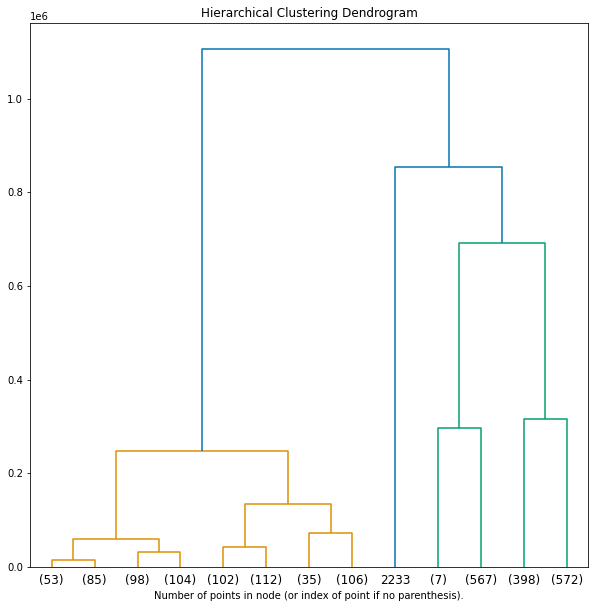

In [72]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# From https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = df.convert_dtypes()#.sample(frac=0.3)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

### Agglomerative

In [136]:
clstr = AgglomerativeClustering(n_clusters=4).fit(X)
silhouette_score(X, clstr.labels_)

0.11003995091369333

### K Means

In [73]:
from sklearn.cluster import KMeans

clstr = KMeans(4, random_state=1024)

X = df.convert_dtypes()
clstr.fit(X)

KMeans(n_clusters=4, random_state=1024)

In [74]:
from sklearn.metrics import silhouette_score

silhouette_score(X, clstr.predict(X))

0.5442813060749659

In [77]:
scores = []
for k in range(2, 11):
    clstr = KMeans(k, random_state=1024).fit(X)
    scores.append({
        'k': k,
        'score': silhouette_score(X, clstr.predict(X))
    })
pd.DataFrame(scores)
# sns.relplot(data=pd.DataFrame(scores), x='k', y='score')

,k,score
0,2,0.594432
1,3,0.598453
2,4,0.544281
3,5,0.525115
4,6,0.535179
5,7,0.542214
6,8,0.518572
7,9,0.517237
8,10,0.521750


### DBSCAN

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X = scl.fit_transform(X)

clstr = DBSCAN(eps=10, min_samples=5).fit(X)
labels = clstr.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
silhouette_score(X, labels)

Estimated number of clusters: 2
Estimated number of noise points: 7


0.418872067434746

In [93]:
totals = []
for i in range(50):
    eps = np.random.uniform(0.5, 5)
    min_samples = np.random.randint(5, 20)

    clstr = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = clstr.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    s = -1
    try:
        s = silhouette_score(X, labels,)
    except Exception:
        pass

    totals.append({
        'eps': eps,
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette': s
    })
totals = pd.DataFrame(totals)
totals.sort_values('silhouette', ascending=False).head(10)

,eps,min_samples,n_clusters,n_noise,silhouette
36,4.748427,13,2,359,0.168179
5,4.711597,10,2,339,0.167485
48,4.549571,13,2,427,0.163869
15,4.985278,5,5,204,0.159721
41,4.359581,9,2,454,0.156792
20,4.613302,6,3,321,0.142658
46,4.030403,9,2,546,0.140373
4,4.576971,9,3,360,0.117597
3,4.657056,10,3,350,0.116605
9,4.019574,5,5,500,0.087265


### OPTICS

In [98]:
from sklearn.cluster import OPTICS

clstr = OPTICS(min_samples=10).fit(X)
labels = clstr.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
silhouette_score(X, labels)

Estimated number of clusters: 2
Estimated number of noise points: 42


0.4212246804388858

In [100]:
totals = []
for min_samples in [5, 7, 10, 12, 15, 20]:
    clstr = OPTICS(min_samples=min_samples).fit(X)
    labels = clstr.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    s = -1
    try:
        s = silhouette_score(X, labels,)
    except Exception:
        pass

    totals.append({
        'min_samples': min_samples,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette': s
    })
totals = pd.DataFrame(totals)
totals.sort_values('silhouette', ascending=False)

,min_samples,n_clusters,n_noise,silhouette
4,15,2,42,0.421225
5,20,2,42,0.421225
2,10,3,15,0.409823
3,12,3,15,0.409823
1,7,14,2082,-0.236758
0,5,34,1962,-0.290836


## Cluster Visualization

In [114]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_transf = tsne.fit_transform(X)
X_transf.shape

array([[-33.578094 , -12.450903 ],
       [-56.7435   ,  12.346787 ],
       [-11.40055  ,  11.2544365],
       ...,
       [ 21.194756 ,  12.326541 ],
       [-13.921292 ,  15.720875 ],
       [ 33.653427 , -10.536602 ]], dtype=float32)

In [138]:
from sklearn.cluster import KMeans

clstr = AgglomerativeClustering(n_clusters=4).fit(X)
alabels = clstr.labels_

clstr = KMeans(n_clusters=3, random_state=1024).fit(X)
klabels = clstr.labels_

clstr = DBSCAN(eps=10, min_samples=5).fit(X)
dblabels = clstr.labels_

clstr = OPTICS(min_samples=10).fit(X)
oplabels = clstr.labels_

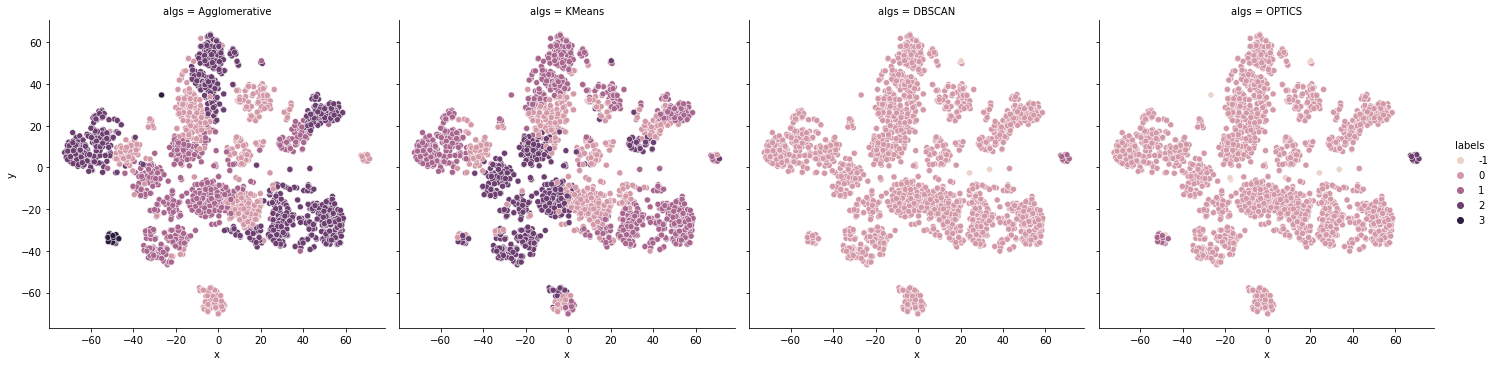

In [141]:
n = X.shape[0]
algs = np.array(['Agglomerative'] * n + ['KMeans'] * n + ['DBSCAN'] * n + ['OPTICS'] * n)
X_plot = np.tile(X_transf, (4,1))
labels = np.concatenate([alabels, klabels, dblabels, oplabels])
plotdata = pd.DataFrame({'x': X_plot[:,0], 'y': X_plot[:,1], 'labels': labels, 'algs': algs})
sns.relplot(data=plotdata, x='x', y='y', hue='labels', col='algs')